### Scikit Learn GridSearchCV   

Johnathan Clementi   
25 March, 2022   
University of Pennsylvania, Master of Urban Spatial Analytics   
Remote Sensing - MUSA 650 - Spring 2022   


The hyper-parameters of a machine learning model are user specified variables that can be adjusted in order to improve the performance of the model. The process of choosing optimal hyper-parameters involves comparing the decision metrics of models with a different hyper-parameter (or combination of hyper-parameters). [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) is a form of Scikit-Learn function which iterates through an exhaustive grid of hyper-parameter combinations, trains a model using those parameters, and then selects the best hyper-parameter combination based on a scoring function.

The function signature of the GridSearchCV is: `GridSearchCV(estimator, param_grid, scoring, refit, cv)`

The first argument, `estimator`, is a regressor or classifier estimator object such as sklearn.svm.SVC())

The `param_grid` is the hyper-parameter space in the form of a Python dictionary. A basic param_grid for an SVC estimator looks like this:    
  `param_grid =  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}`   
A grid search run with this parameter grid will test 8 models (4 $C$ parameters * 2 gamma parameters * 1 kernel parameter)
<table>
		<thead>
			<tr>
				<th>Model #<br></th>
				<th>C</th>
				<th>gamma</th>
				<th>kernel</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>0<br></td>
				<td>1<br></td>
				<td>0.001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>1</td>
				<td>1</td>
				<td>0.0001</td>
				<td>rbf <br></td>
			</tr>
			<tr>
				<td>2</td>
				<td>10</td>
				<td>0.001 <br></td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>3</td>
				<td>10</td>
				<td>0.0001 <br></td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>4</td>
				<td>100</td>
				<td>0.001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>5</td>
				<td>100</td>
				<td>0.0001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>6</td>
				<td>1000</td>
				<td>0.001</td>
				<td>rbf</td>
			</tr>
			<tr>
				<td>7</td>
				<td>1000</td>
				<td>0.0001</td>
				<td>rbf</td>
			</tr>
		</tbody>
	</table>


The `scoring` argument provides the metric(s) by which the model will be compared. It can be omitted, provided a single string value, or a list/tuple of unique strings for [model scoring metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring) This possible scoring metrics are dictated by the model used (e.g. r2 is only available to regressor estimators)    

The `refit` argument dictates whether a new estimator will be trained after the optimal hyper-parameters have been found. The default value is `True`. If `True`, the new refit estimator can be used to predict on outside data [**1**].    

The `cv` argument provides the number of folds to run. The default value is 5 folds.   
   

[**1**] While it is not the purpose of this document to compare non-nested and nested cross-validation, it worth noting that the most robust way to tune hyper-parameters is through nested cross-valiation as there is not a chance of information leakage from model training to testing. For more information, please see Scikit-Learn's article on [Nested versus non-nested cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).



In this example, we will illustrate the use of the GridSearchCV to tune the hyper-parameters for a model classifying the number in an image in the MNIST digits dataset.


In [16]:
# Import the necessary libraries

# Pandas is commonly aliased as pd
import pandas as pd
# Numpy is commonly aliased as np
import numpy as np

# The Modified National Institute of Standards and Technology (MNIST) database provides
# robust sample datasets which can be accessed through the Keras/Tensorflow libraries.
# In this example, we will be using the MNIST hand-written digits dataset
# For more information on how to access MNIST data, see https://www.tensorflow.org/datasets/catalog/mnist
from keras.datasets import mnist


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


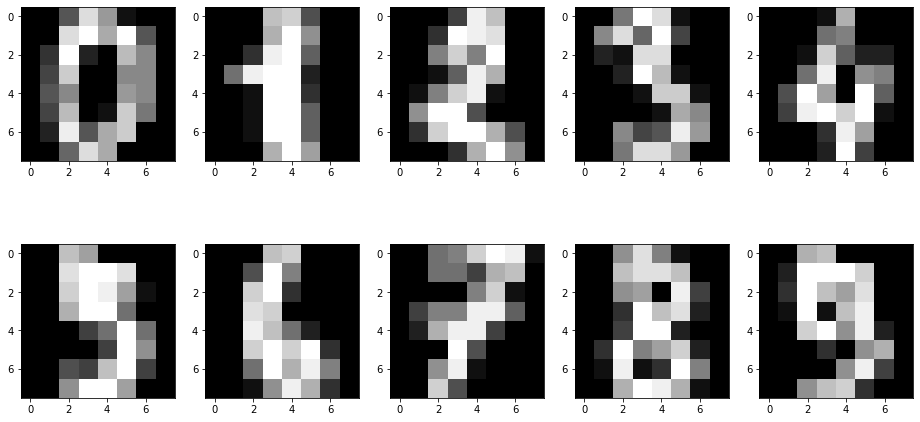

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

for i in range(10):  
  plt.subplot(2,5, i+1)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()  

In [21]:
# Vectorize data to pass it to an estimator
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)
